In [1]:
from pandas import DataFrame
from scipy.special import ndtri #Returns the argument x for which the area under 
#the Gaussian probability density function (integrated from minus infinity to x) is equal to y.

import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
y_t=[3083,3149,3218,3239,3295,3374,3475,3569,3597,3725,3794,3959,4043,4194,4318,4493,4683,4850,5005,5236]

In [3]:
x_t=[75,78,80,82,84,88,93,97,99,104,109,115,120,127,135,144,153,161,170,182]

In [4]:
d = {'Sales': y_t, 'Advertising': x_t}
data = pd.DataFrame(data=d)

In [5]:
data

,Sales,Advertising
0,3083,75
1,3149,78
2,3218,80
3,3239,82
4,3295,84
5,3374,88
6,3475,93
7,3569,97
8,3597,99
9,3725,104


In [6]:
#I'll arrange the points column data in ascending order
data= data.sort_values(by=['Sales'],ascending=True).reset_index()

In [7]:
data.head()

,index,Sales,Advertising
0,0,3083,75
1,1,3149,78
2,2,3218,80
3,3,3239,82
4,4,3295,84


In [8]:
#I'll divide the standard normal distribution that is the theoretical distribution into n+1 equal parts where n is the number 
# of data points,
data['count']= data.index + 1

In [9]:
data.head()

,index,Sales,Advertising,count
0,0,3083,75,1
1,1,3149,78,2
2,2,3218,80,3
3,3,3239,82,4
4,4,3295,84,5


In [14]:
n_rows = data.shape[0] #20 filas

In [15]:
data['percentile_area']= (data['count'])/n_rows

In [16]:
data['z_theoritical']= ndtri(data['percentile_area'])

In [17]:
data

,index,Sales,Advertising,count,percentile_area,z_theoritical
0,0,3083,75,1,0.05,-1.644854
1,1,3149,78,2,0.10,-1.281552
2,2,3218,80,3,0.15,-1.036433
3,3,3239,82,4,0.20,-0.841621
4,4,3295,84,5,0.25,-0.674490
5,5,3374,88,6,0.30,-0.524401
6,6,3475,93,7,0.35,-0.385320
7,7,3569,97,8,0.40,-0.253347
8,8,3597,99,9,0.45,-0.125661
9,9,3725,104,10,0.50,0.000000


In [22]:
data['Sales']

0     3083
1     3149
2     3218
3     3239
4     3295
5     3374
6     3475
7     3569
8     3597
9     3725
10    3794
11    3959
12    4043
13    4194
14    4318
15    4493
16    4683
17    4850
18    5005
19    5236
Name: Sales, dtype: int64

In [23]:
data['Sales'].mean()

3914.95

In [26]:
data['Sales'].std(ddof=0)

646.2921533640958

In [19]:
data['z_actual'] = (data['Sales']-data['Sales'].mean()) / data['Sales'].std(ddof=0)

In [20]:
data.head()

,index,Sales,Advertising,count,percentile_area,z_theoritical,z_actual
0,0,3083,75,1,0.05,-1.644854,-1.287266
1,1,3149,78,2,0.10,-1.281552,-1.185145
2,2,3218,80,3,0.15,-1.036433,-1.078382
3,3,3239,82,4,0.20,-0.841621,-1.045889
4,4,3295,84,5,0.25,-0.674490,-0.959241


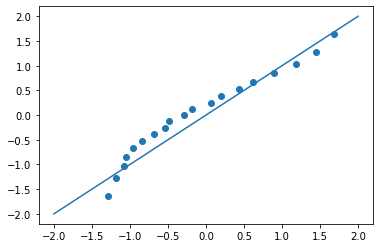

In [16]:
plt.scatter(data.z_actual,data.z_theoritical)
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2])

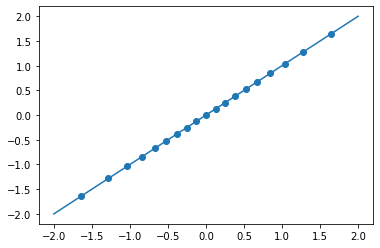

In [17]:
plt.scatter(data.z_theoritical,data.z_theoritical)
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2])

In [18]:
ndtri(0.061)

-1.546433122256748